In [8]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


try:
# Carica il tuo file XLSX
    xlsx_file = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/dataset/richerDataset.xlsx'  # Sostituisci con il percorso del tuo file

# Leggi i dati dal file XLSX e crea un DataFrame
    df: DataFrame = pd.read_excel(xlsx_file)

# Ora hai un DataFrame con tutti i dati dal tuo file XLSX che puoi utilizzare per l'analisi.
except FileNotFoundError as e:
    print("Il file non è stato trovato.")
# except Exception as e:
    print(f"Si è verificato un errore: {e}")                                                          
    
# Rimuovi il record con k_m2 uguale a 0
df = df[df['k_m2'] != 0]
#Rimuovi colonne Porosity tot e SSA tot
df = df.drop(['Porosity_Tot', 'SSA_Tot'], axis=1)
# Resetta gli indici del DataFrame
df.reset_index(drop=True, inplace=True)


k2_max = df['k_m2'].max()
k2_min = df['k_m2'].min()
print(df)

    Conn.Dens.  Porosity     SSA      Ech  Tortuosity          k_m2
0      310.913     0.137   5.065  -25.849      2.0340  1.473350e-12
1      310.913     0.147   5.253  -31.002      2.6650  2.254724e-12
2      310.913     0.131   4.697  -20.047      2.1090  9.543177e-12
3      350.137     0.115   5.583  -50.613      4.1830  9.664920e-13
4      350.137     0.139   7.447 -136.737      2.5950  9.180783e-13
5      350.137     0.115   5.311  -32.907      4.1010  1.435774e-12
6      368.141     0.134   6.990 -115.218      2.7740  4.010302e-13
7      368.141     0.138   7.132 -110.411      2.7790  3.937021e-12
8      368.141     0.116   5.290  -39.748      3.8680  1.933907e-12
9       10.573     0.020   0.791   -3.948      3.1000  3.021802e-13
10      10.573     0.020   0.806   -2.017      2.9000  3.190436e-13
11     458.436     0.273   7.721 -102.424      1.7170  5.516051e-11
12     458.436     0.250   6.870  -76.478      1.3530  3.822390e-11
13     458.436     0.265   7.560  -95.050      1

In [9]:
try:
# Carica il tuo file XLSX
    xlsx_file = ('C:/Users/lori'
                 's/Desktop/Python Workspace/FirstTryMiller/dataset/tentativo finale/extra.xlsx')  # Sostituisci con il percorso del tuo file

# Leggi i dati dal file XLSX e crea un DataFrame
    df_extra_training: DataFrame = pd.read_excel(xlsx_file)

# Ora hai un DataFrame con tutti i dati dal tuo file XLSX che puoi utilizzare per l'analisi.
except FileNotFoundError as e:
    print("Il file non è stato trovato.")
# except Exception as e:
    print(f"Si è verificato un errore: {e}")                                                          

df_extra_training.index = df_extra_training.index + len(df)    
# Rimuovi il record con k_m2 uguale a 0
df_extra_training = df_extra_training[df_extra_training['k_m2'] != 0]
#Rimuovi colonne Porosity tot e SSA tot
df_extra_training = df_extra_training.drop(['Porosity_Tot', 'SSA_Tot'], axis=1)


k2_max = df_extra_training['k_m2'].max()
k2_min = df_extra_training['k_m2'].min()
print(df_extra_training)

    Conn.Dens.  Porosity        SSA         Ech  Tortuosity          k_m2
47   28.320000  0.043000   2.511000  -28.011000       3.600  5.500000e-14
48  518.541000  0.237048   6.757200 -127.000000       1.328  3.762810e-11
49  518.541000  0.218960   6.757200 -167.000000       2.408  9.867718e-12
50  518.541000  0.237286   7.320300 -220.000000       2.428  6.567718e-12
51  553.612000  0.294816   6.118200 -127.000000       1.590  3.762810e-11
52  553.612000  0.272320   6.118200 -200.000000       1.900  8.508645e-11
53  553.612000  0.295112   6.628050 -250.000000       1.870  6.782754e-11
54  371.124000  0.234060   5.358000 -127.000000       1.975  1.264402e-11
55  371.124000  0.216200   5.358000 -180.000000       2.473  8.867718e-12
56  371.124000  0.234295   5.804500 -220.000000       1.817  1.508066e-11
57  300.000000  0.129000   1.321734 -216.625000       3.340  8.270667e-13
58  300.000000  0.125000   1.224750 -192.679000       4.349  9.647262e-13
59   28.608500  0.138049   1.385846  -

In [10]:
#Concateno entrambe i dataset per avere subito tutto insieme
df_augmented = pd.concat([df, df_extra_training], ignore_index=True)

df_augmented.values

array([[ 3.10913000e+02,  1.37000000e-01,  5.06500000e+00,
        -2.58490000e+01,  2.03400000e+00,  1.47334950e-12],
       [ 3.10913000e+02,  1.47000000e-01,  5.25300000e+00,
        -3.10020000e+01,  2.66500000e+00,  2.25472410e-12],
       [ 3.10913000e+02,  1.31000000e-01,  4.69700000e+00,
        -2.00470000e+01,  2.10900000e+00,  9.54317700e-12],
       [ 3.50137000e+02,  1.15000000e-01,  5.58300000e+00,
        -5.06130000e+01,  4.18300000e+00,  9.66492000e-13],
       [ 3.50137000e+02,  1.39000000e-01,  7.44700000e+00,
        -1.36737000e+02,  2.59500000e+00,  9.18078300e-13],
       [ 3.50137000e+02,  1.15000000e-01,  5.31100000e+00,
        -3.29070000e+01,  4.10100000e+00,  1.43577360e-12],
       [ 3.68141000e+02,  1.34000000e-01,  6.99000000e+00,
        -1.15218000e+02,  2.77400000e+00,  4.01030190e-13],
       [ 3.68141000e+02,  1.38000000e-01,  7.13200000e+00,
        -1.10411000e+02,  2.77900000e+00,  3.93702120e-12],
       [ 3.68141000e+02,  1.16000000e-01,  5.290

In [23]:
# Calcola le statistiche descrittive per tutto il DataFrame
descriptive_stats = df.describe()

# Stampa le statistiche descrittive
print("Descriptive Statistics:\n", descriptive_stats)

Descriptive Statistics:
        Conn.Dens.   Porosity        SSA         Ech  Tortuosity          k_m2
count   47.000000  47.000000  47.000000   47.000000   47.000000  4.700000e+01
mean   270.504617   0.121851   6.172596 -106.591532    3.170772  8.913665e-12
std    159.433831   0.067019   2.449245   74.449813    0.878953  2.483465e-11
min     10.573000   0.020000   0.791000 -362.849000    1.340000  2.456179e-14
25%    116.198000   0.078000   4.747000 -156.334000    2.776500  3.106119e-13
50%    307.044000   0.115000   5.808000 -110.411000    3.313300  5.462786e-13
75%    359.139000   0.137500   7.687000  -44.292500    3.834000  1.447758e-12
max    607.796000   0.297000  10.300000   -2.017000    4.459000  1.319490e-10


In [24]:
# Controlla i valori mancanti
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Calcola la matrice di correlazione
correlation_matrix = df.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Missing Values:
 Conn.Dens.    0
Porosity      0
SSA           0
Ech           0
Tortuosity    0
k_m2          0
dtype: int64

Correlation Matrix:
             Conn.Dens.  Porosity       SSA       Ech  Tortuosity      k_m2
Conn.Dens.    1.000000  0.864499  0.664176 -0.639080   -0.617447  0.587967
Porosity      0.864499  1.000000  0.632855 -0.523979   -0.697743  0.767341
SSA           0.664176  0.632855  1.000000 -0.754408   -0.229806  0.259044
Ech          -0.639080 -0.523979 -0.754408  1.000000    0.300040 -0.455071
Tortuosity   -0.617447 -0.697743 -0.229806  0.300040    1.000000 -0.634436
k_m2          0.587967  0.767341  0.259044 -0.455071   -0.634436  1.000000


<Figure size 1200x1200 with 0 Axes>

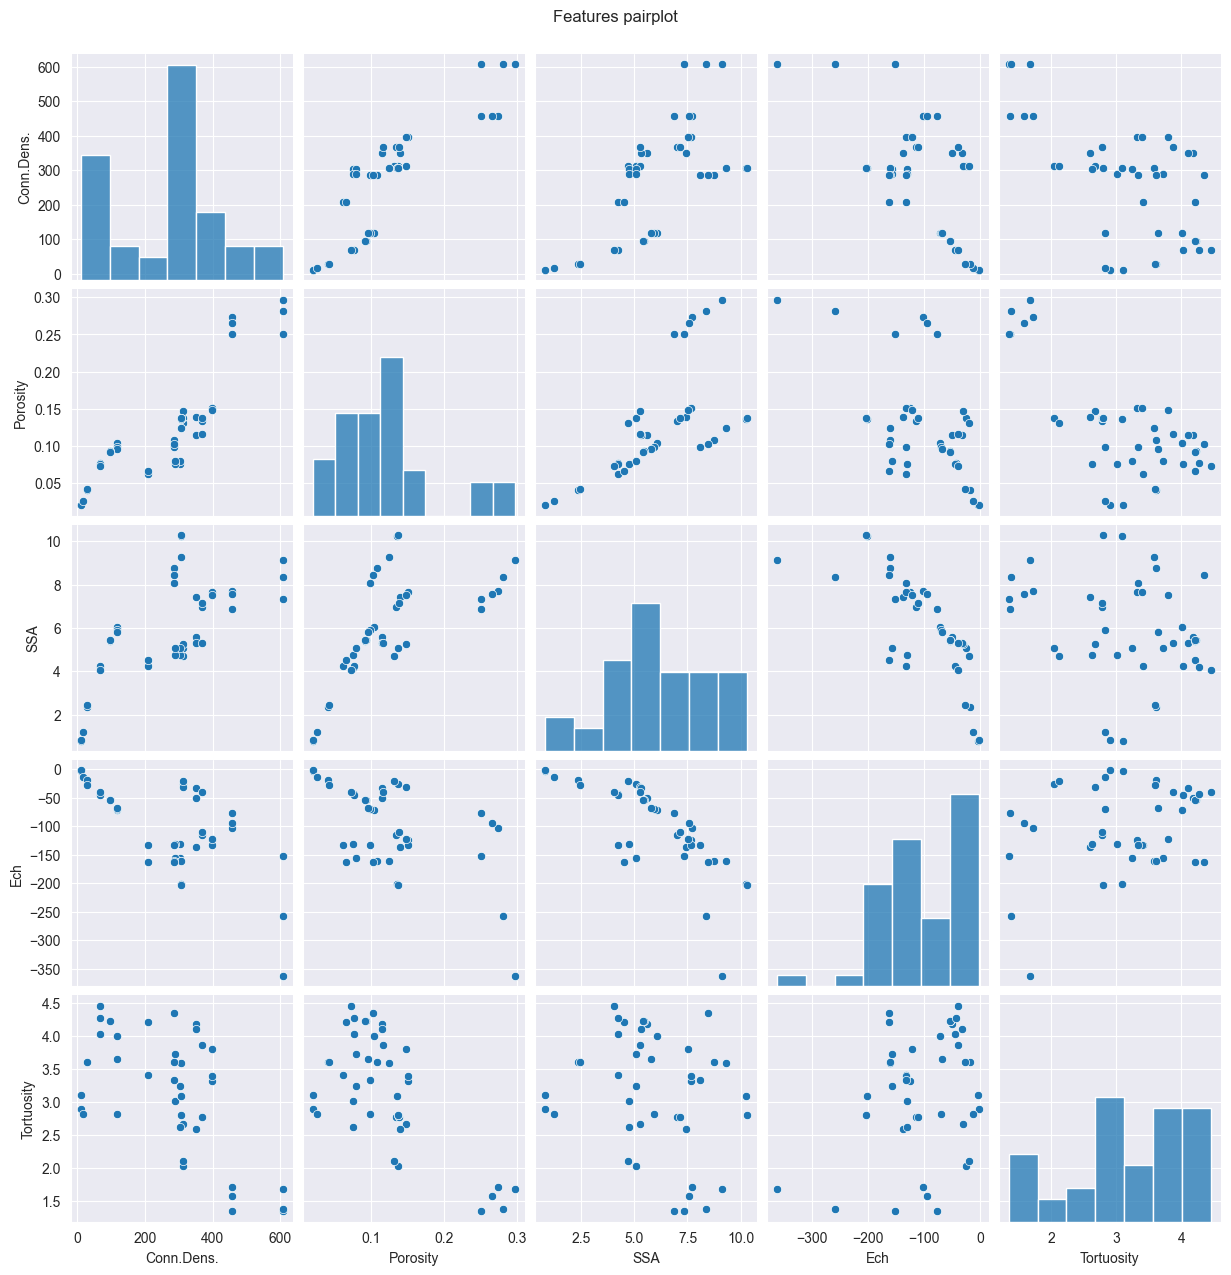

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea una copia del dataframe originale per applicare la log-trasformazione solo alla colonna 'k_m2'
df_logTransformed = df.copy()

# Applica la trasformazione logaritmica solo alla colonna target 'k_m2'
df_logTransformed['k_m2'] = np.log(df_logTransformed['k_m2'])

# Rimuovi la colonna originale 'k_m2' dal DataFrame di appoggio se necessario
df_log_transformed = df_logTransformed.drop('k_m2', axis=1)

# Definisci il percorso di salvataggio come variabile
save_path = "C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/extract"  # Modifica questo con il percorso desiderato

# Pairplot delle variabili
plt.figure(figsize=(12, 12))
sns.pairplot(df_log_transformed)
# Add title using plt.suptitle (which stands for 'super title' and places it above the plot grid)
plt.suptitle("Features pairplot", y=1.02)  # Adjust 'y' to move the title further up
# plt.tight_layout()  # To ensure there's no clipping of labels/titles
plt.savefig(f"{save_path}/pairplot_all_variables.png")  # Save the pairplot as an image file
plt.savefig(f"{save_path}/pairplot_all_variables.pdf", dpi=300)  # Save the pairplot as a PDF file
plt.show()


In [31]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# Eseguo lo scaler per tutto il dataset, in modo da effettuare lo scaler omogeneamente su tutti i valori
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df_augmented)
# Crea un nuovo DataFrame con i dati scalati e riassegna le colonne non scalate
#df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)
df_scaled = pd.DataFrame(scaled_data, columns=df_augmented.columns)

# Stampa il DataFrame scalato
print("DataFrame scalato:")
print(df_scaled)


DataFrame scalato:
    Conn.Dens.  Porosity       SSA       Ech  Tortuosity      k_m2
0     0.502894  0.429197  0.387136  0.933953    0.222573  0.010982
1     0.502894  0.464873  0.404165  0.919672    0.421501  0.016905
2     0.502894  0.407792  0.353803  0.950032    0.246217  0.072152
3     0.568572  0.350712  0.434057  0.865322    0.900063  0.007140
4     0.568572  0.436333  0.602897  0.626641    0.399433  0.006773
..         ...       ...       ...       ...         ...       ...
74    0.117715  0.020661  0.402441  0.831747    0.779319  0.000068
75    0.137703  0.037337  0.444532  0.461755    0.558638  0.001851
76    0.238377  0.092765  0.699844  0.989091    0.590164  0.001477
77    0.129436  0.035485  0.380905  0.870055    0.684741  0.001967
78    0.240157  0.093391  0.646688  0.782380    0.590164  0.001667

[79 rows x 6 columns]


In [12]:
# Questo sarà il dataset che utilizzeremo per la previsione finale (tutto meno che la colonna target)
df_scaled_forLastPrediction=df_scaled.drop(['k_m2'], axis=1)

In [13]:
df_scaled_forLastPrediction

,Conn.Dens.,Porosity,SSA,Ech,Tortuosity
0,0.502894,0.429197,0.387136,0.933953,0.222573
1,0.502894,0.464873,0.404165,0.919672,0.421501
2,0.502894,0.407792,0.353803,0.950032,0.246217
3,0.568572,0.350712,0.434057,0.865322,0.900063
4,0.568572,0.436333,0.602897,0.626641,0.399433
...,...,...,...,...,...
74,0.117715,0.020661,0.402441,0.831747,0.779319
75,0.137703,0.037337,0.444532,0.461755,0.558638
76,0.238377,0.092765,0.699844,0.989091,0.590164
77,0.129436,0.035485,0.380905,0.870055,0.684741


Qui divido i due dataset per mantenere i dataset separati. Vanno ricreate le stesse condizioni per avere lo stesso splitting ed ottenere lo stesso test-set

In [32]:
# Recupera il numero di righe di ciascun DataFrame originale
n_rows_df = len(df)  # Numero di righe del primo DataFrame
n_rows_df_extra = len(df_extra_training)  # Numero di righe del secondo DataFrame

# Dividi il DataFrame scalato in due, usando l'informazione sulla lunghezza originale
df_scaled_part1 = df_scaled.iloc[:n_rows_df, :]  # Dati corrispondenti a df
df_scaled_part2 = df_scaled.iloc[n_rows_df:, :]  # Dati corrispondenti a df_extra_training

# Stampa i DataFrame risuddivisi
print("DataFrame scalato (parte 1 - df):")
print(df_scaled_part1)

print("\nDataFrame scalato (parte 2 - df_extra_training):")
print(df_scaled_part2)

DataFrame scalato (parte 1 - df):
    Conn.Dens.  Porosity       SSA       Ech  Tortuosity      k_m2
0     0.502894  0.429197  0.387136  0.933953    0.222573  0.010982
1     0.502894  0.464873  0.404165  0.919672    0.421501  0.016905
2     0.502894  0.407792  0.353803  0.950032    0.246217  0.072152
3     0.568572  0.350712  0.434057  0.865322    0.900063  0.007140
4     0.568572  0.436333  0.602897  0.626641    0.399433  0.006773
5     0.568572  0.350712  0.409419  0.914392    0.874212  0.010697
6     0.598718  0.418495  0.561502  0.686278    0.455864  0.002854
7     0.598718  0.432765  0.574364  0.699600    0.457440  0.029657
8     0.598718  0.354280  0.407517  0.895433    0.800757  0.014473
9     0.000000  0.011798  0.000000  0.994648    0.558638  0.002104
10    0.000000  0.011798  0.001359  1.000000    0.495586  0.002232
11    0.749909  0.914380  0.627715  0.721735    0.122636  0.417936
12    0.749909  0.832327  0.550632  0.793641    0.007881  0.289555
13    0.749909  0.885839  0.

In [33]:
#Dichiarazione dataset train 'X' e test 'y'
X = df_scaled_part1.drop('k_m2', axis=1)
y = df_scaled_part1['k_m2']
    
X_augmented = df_scaled_part2.drop('k_m2', axis=1)
y_augmented = df_scaled_part2['k_m2']

Questa fase viene eseguita la PCA analysis

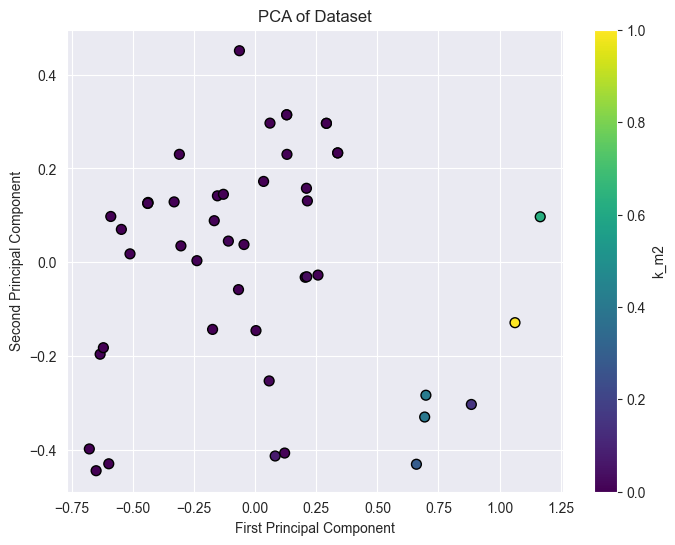

In [35]:
from sklearn.decomposition import PCA

#TODO: qui sarebbe carino vedere la PCA per ogni tipo di roccia

# Inizializzare la PCA e specificare il numero di componenti principali
pca = PCA(n_components=2)

# Adattare la PCA ai dati e trasformarli
X_pca = pca.fit_transform(X)

# Creare un DataFrame con le componenti principali
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Dataset')
plt.colorbar(label='k_m2')
plt.grid(True)
plt.show()


In [36]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance}")
print(f"Total explained variance: {explained_variance.sum()}")


Explained variance by each component: [0.68816193 0.19306658]
Total explained variance: 0.881228514595892


Primo training grezzo per la ricerca del miglior random state

Random state: 0 - R^2 score: 0.9889275303774814 
Random state: 1 - R^2 score: 0.05185431460946188 
Random state: 2 - R^2 score: -1.0141674034058799 
Random state: 3 - R^2 score: 0.6263888894060665 
Random state: 4 - R^2 score: 0.3972555462724998 
Random state: 5 - R^2 score: 0.013561939417894742 
Random state: 6 - R^2 score: -20.550800592026473 
Random state: 7 - R^2 score: 0.6113617394880541 
Random state: 8 - R^2 score: 0.5997115173014347 
Random state: 9 - R^2 score: 0.7006057115718071 
Random state: 10 - R^2 score: 0.04650526640856367 
Random state: 11 - R^2 score: -18.504304163461207 
Random state: 12 - R^2 score: -0.3331509863239721 
Random state: 13 - R^2 score: -76.14144711401588 
Random state: 14 - R^2 score: 0.11014385733727938 
Random state: 15 - R^2 score: -20.214932938832444 
Random state: 16 - R^2 score: -1.1437894346808304 
Random state: 17 - R^2 score: 0.6108693396459625 
Random state: 18 - R^2 score: 0.6267330710849466 
Random state: 19 - R^2 score: 0.6242028409038824 

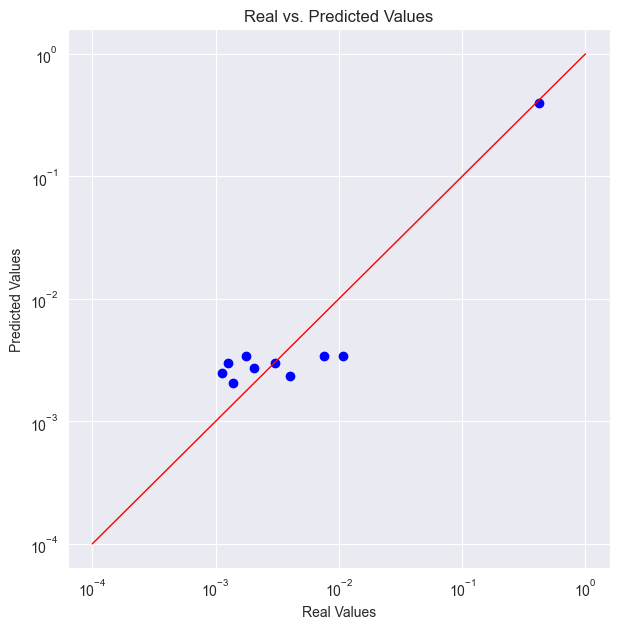

In [37]:
import os

best_y_pred = None
best_y_test = None
best_X_test = None
best_X_train = None
best_y_train = None
best_random_state_split = None
best_score_split = -float('inf')
preliminary_model = None


scores = []
random_states = []
    
for random_state in range(0, 100):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    model = XGBRegressor()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
        
    scores.append(score)
    random_states.append(random_state)

    print(f"Random state: {random_state} - R^2 score: {score} ")
    if score > best_score_split:
        preliminary_model = model
        best_score_split = score
        best_random_state_split = random_state
        best_y_test = y_test
        best_y_pred = y_pred
        best_X_train = X_train
        best_X_test = X_test
        best_y_train = y_train

print(f"Best random_state for train_test_split: {best_random_state_split} with R^2 score: {best_score_split}")

relative_path_png = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/extract/model_1/png'
relative_path_pdf = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/extract/model_1/pdf'

plt.figure(figsize=(7, 7))
plt.scatter(best_y_test, best_y_pred, color='blue')  # Cambia il colore dei punti in blu
plt.plot([10**-4, 10**0], [10**-4, 10**0], 'r-', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.xscale('log', base=10)
plt.yscale('log', base=10)
plt.grid(True)  # Disabilita la griglia

# Salva il grafico come immagine PNG
plt.savefig(f'{relative_path_png}/preliminaryTraining.png')  # Salva il grafico come immagine PNG
# Salva il grafico come PDF
plt.savefig(f'{relative_path_pdf}/preliminaryTraining.pdf', dpi=300)  # Salva il grafico come PDF

plt.show()

In [17]:
print(best_y_test)
print(best_y_pred)

20    0.001381
41    0.001757
34    0.001132
42    0.007556
26    0.002038
44    0.001272
21    0.004007
27    0.003040
39    0.010879
11    0.417936
Name: k_m2, dtype: float64
[0.00203735 0.00342266 0.00250029 0.0033838  0.00274262 0.00298612
 0.00235377 0.00296821 0.00342266 0.39975727]


Fitting 10 folds for each of 1944 candidates, totalling 19440 fits
Best parameters found: {'alpha': 0.1, 'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.3, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.7}
R^2 score: 0.9991354818102584
MSE: 1.3360550795974227e-05
MAE: 0.0029842116805791083


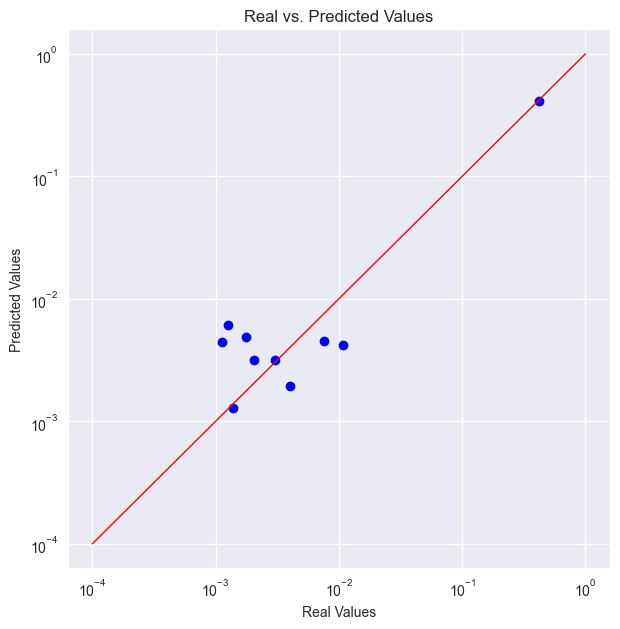

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from tqdm import tqdm
import joblib

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],  
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'min_child_weight': [1, 5],
    'gamma': [0, 0.1],
    'alpha': [0, 0.1]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=best_random_state_split)
model = XGBRegressor(random_state=best_random_state_split)


loo = LeaveOneOut()
# Usa joblib per patchare il parallel computing di scikit-learn
with joblib.parallel_backend('loky', inner_max_num_threads=1):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"R^2 score: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")



relative_path_png = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/extract/model_1/png/'
relative_path_pdf = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/extract/model_1/pdf'
# Assicurati che la directory esista
os.makedirs(os.path.dirname(relative_path_png), exist_ok=True)
os.makedirs(os.path.dirname(relative_path_pdf), exist_ok=True)

plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, color='blue')  # Cambia il colore dei punti in blu
plt.plot([10**-4, 10**0], [10**-4, 10**0], 'r-', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.xscale('log', base=10)
plt.yscale('log', base=10)
plt.grid(True)  # Disabilita la griglia

# Salva il grafico come immagine PNG
plt.savefig(f'{relative_path_png}/hyperParam_tuning.png')  # Salva il grafico come immagine PNG
# Salva il grafico come PDF
plt.savefig(f'{relative_path_pdf}hyperParam_tuning.pdf', dpi=300)  # Salva il grafico come PDF

plt.show()

In [39]:
# Crea un DataFrame con i valori reali e predetti
results_df = pd.DataFrame({
    'Valori Reali': y_test,
    'Valori Predetti': y_pred
})

# Stampa il DataFrame
results_df

,Valori Reali,Valori Predetti
20,0.001381,0.001278
41,0.001757,0.004842
34,0.001132,0.004429
42,0.007556,0.004502
26,0.002038,0.003146
44,0.001272,0.006078
21,0.004007,0.001934
27,0.003040,0.003146
39,0.010879,0.004186
11,0.417936,0.412416


Valutazione del modello
- QQ plot
- Residual plot
- Feature importance
- Bias-Variance Tradeoff 

   Theoretical Quantiles  Ordered Values (Residuals)
0              -1.498767                   -0.004805
1              -0.984947                   -0.003296
2              -0.647038                   -0.003085
3              -0.371098                   -0.001108
4              -0.121214                   -0.000106
5               0.121214                    0.000103
6               0.371098                    0.002073
7               0.647038                    0.003053
8               0.984947                    0.005520
9               1.498767                    0.006693


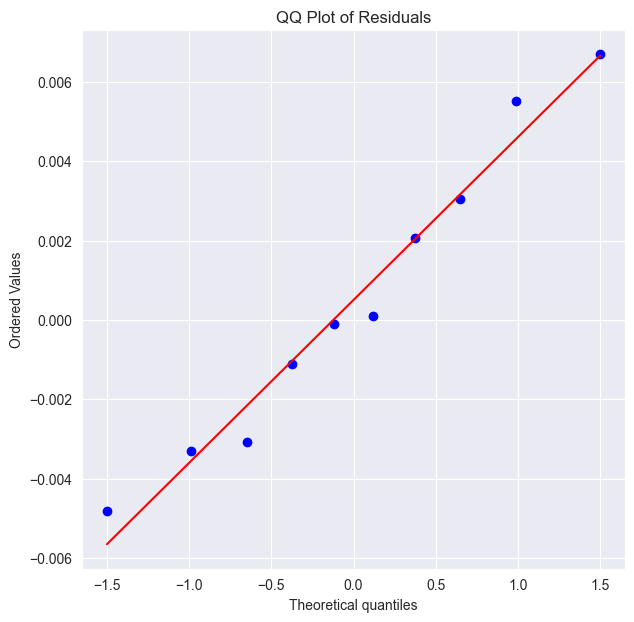

In [40]:
##  - QQ PLOT -
import scipy.stats as stats

# Verifica che le lunghezze di best_y_test e best_y_pred siano uguali
if len(best_y_test) != len(y_pred):
    raise ValueError("Le lunghezze di best_y_test e best_y_pred non sono uguali!")

# Calcola i residui
residuals = best_y_test - y_pred

# Genera i valori per il QQ plot senza disegnarlo
(theoretical_quantiles, ordered_values), (slope, intercept, r) = stats.probplot(residuals, dist="norm")

# Crea un DataFrame per visualizzare i valori in due colonne
df_qq = pd.DataFrame({
    'Theoretical Quantiles': theoretical_quantiles,
    'Ordered Values (Residuals)': ordered_values
})
# Stampa il DataFrame
print(df_qq)

plt.figure(figsize=(7, 7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.grid(True)

# Salva il grafico come immagine PNG
plt.savefig(f'{relative_path_png}/qq.png')  # Salva il grafico come immagine PNG
# Salva il grafico come PDF
plt.savefig(f'{relative_path_pdf}/qq.pdf', dpi=300)  # Salva il grafico come PDF

plt.show()

In [41]:
df_qq

,Theoretical Quantiles,Ordered Values (Residuals)
0,-1.498767,-0.004805
1,-0.984947,-0.003296
2,-0.647038,-0.003085
3,-0.371098,-0.001108
4,-0.121214,-0.000106
5,0.121214,0.000103
6,0.371098,0.002073
7,0.647038,0.003053
8,0.984947,0.005520
9,1.498767,0.006693


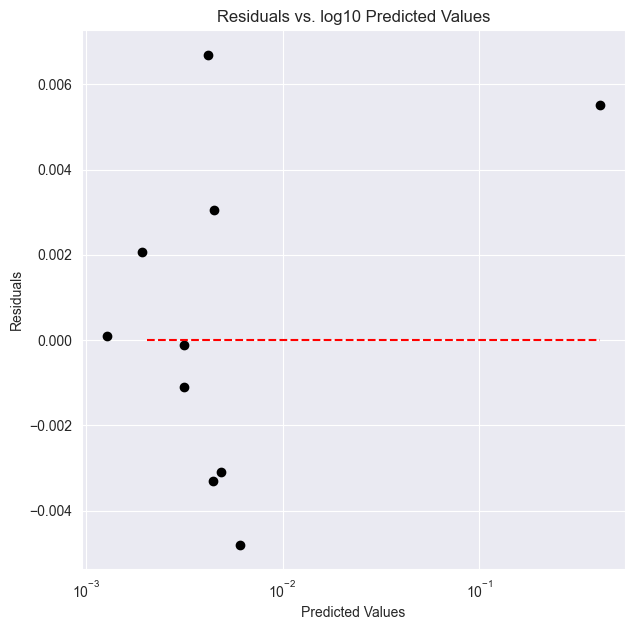

In [42]:
# Calcola i residui
residuals = best_y_test - y_pred

# Applica la trasformazione log10 ai valori predetti
log_predicted_values = np.log10(y_pred)

# Crea un DataFrame per i valori predetti scalati in log10 e i residui
df_residuals = pd.DataFrame({
    'Predicted Values (log10)': log_predicted_values,
    'Residuals': residuals
})

# Plot dei residui in log10 view
plt.figure(figsize=(7, 7))
plt.scatter(y_pred, residuals, color='black')
plt.hlines(0, min(best_y_pred), max(y_pred), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.xscale('log', base=10)
plt.title('Residuals vs. log10 Predicted Values')
plt.grid(True)
plt.savefig(f"{relative_path_pdf}/residuals_log10.pdf", dpi=300)
plt.savefig(f"{relative_path_png}/residuals_log10.png")
plt.show()



In [43]:
# Stampa il DataFrame per visualizzare i dati plottati
df_residuals

,Predicted Values (log10),Residuals
20,-2.893497,0.000103
41,-2.314948,-0.003085
34,-2.353738,-0.003296
42,-2.346556,0.003053
26,-2.502290,-0.001108
44,-2.216262,-0.004805
21,-2.713514,0.002073
27,-2.502290,-0.000106
39,-2.378191,0.006693
11,-0.384665,0.005520


      Feature  Importance
0  Conn.Dens.    0.411225
1    Porosity    0.569632
2         SSA    0.000231
3         Ech    0.006301
4  Tortuosity    0.012612


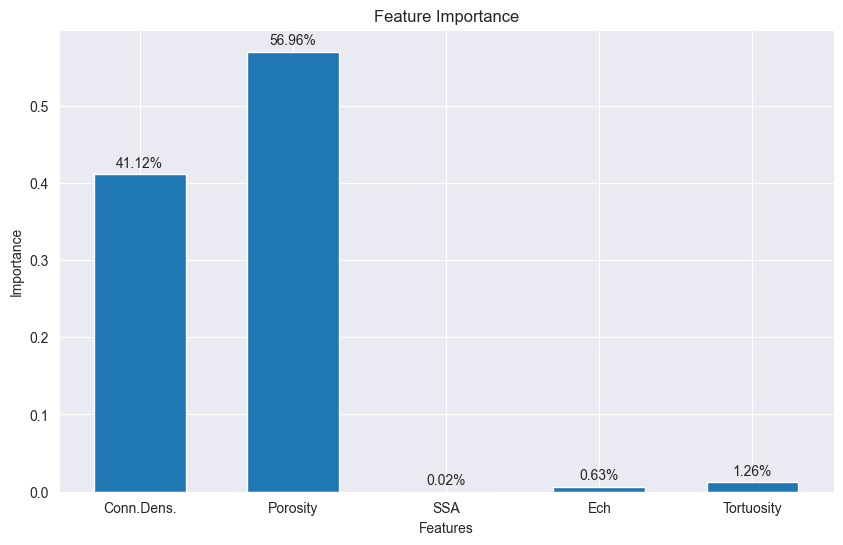

In [44]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Crea un DataFrame per visualizzare i valori in modo chiaro
df_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
})

# Stampa il DataFrame
print(df_feature_importance)

# Example code to plot feature importance with values annotated on each bar
plt.figure(figsize=(10, 6))

# Adjust the width of the bars
bar_width = 0.6  # Reduce this value to make the bars narrower

# Plot the bars with the specified width
bars = plt.bar(range(len(best_model.feature_importances_)), best_model.feature_importances_, width=bar_width)
plt.xticks(range(len(best_model.feature_importances_)), X.columns, rotation=0)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.grid(True)

# Annotate the bars with the importance values as percentages
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2%}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Salva il grafico come immagine PNG
plt.savefig(f'{relative_path_png}/feature_importance.png')  # Salva il grafico come immagine PNG
# Salva il grafico come PDF
plt.savefig(f'{relative_path_pdf}/feature_importance.pdf', dpi=300)  # Salva il grafico come PDF
plt.show()

In [45]:
df_feature_importance

,Feature,Importance
0,Conn.Dens.,0.411225
1,Porosity,0.569632
2,SSA,0.000231
3,Ech,0.006301
4,Tortuosity,0.012612


Questo è il corretto modello di Bias-Variance Tradeoff

C:\Users\loris\Desktop\Python Workspace\FirstTryMiller\venv\Lib\site-packages\sklearn\model_selection\_validation.py:1776: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 40 instead of 47.
  warnings.warn(


Training Scores:
    Training examples       MSE
0                   4  0.000658
1                   5  0.000584
2                   6  0.000510
3                   7  0.000475
4                   8  0.000626
5                   9  0.000616
6                  10  0.000515
7                  11  0.000447
8                  12  0.001025
9                  13  0.001045
10                 14  0.000728
11                 15  0.000705
12                 16  0.000938
13                 17  0.000931
14                 18  0.000892
15                 19  0.000849
16                 20  0.000809
17                 21  0.000777
18                 22  0.000728
19                 23  0.000705
20                 24  0.000661
21                 25  0.000628
22                 26  0.000599
23                 27  0.000579
24                 28  0.000564
25                 29  0.000542
26                 30  0.000535
27                 31  0.000523
28                 32  0.000502
29                 33  

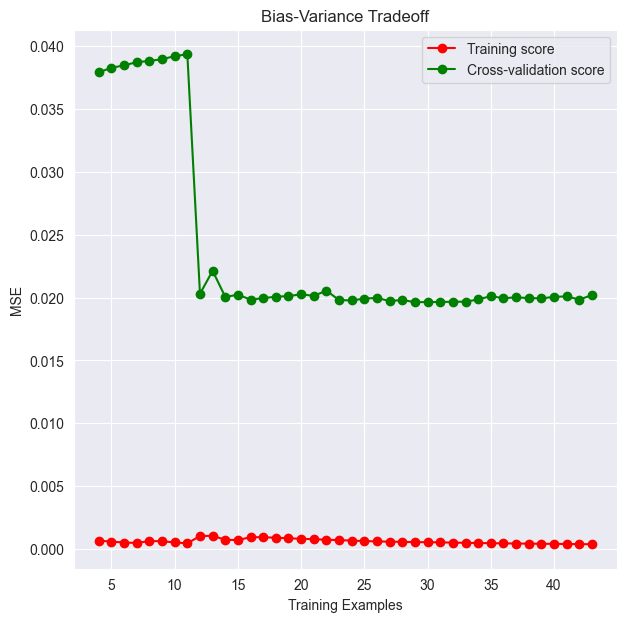

In [46]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

# Bias-Variance plot with MSE
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=15, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, len(X))
)

train_scores_mean = -np.mean(train_scores, axis=1)  # Invert sign for positive MSE
test_scores_mean = -np.mean(test_scores, axis=1)

# Crea due DataFrame separati per visualizzare i punteggi di Training e di Cross-validation
df_train_scores = pd.DataFrame({
    'Training examples': train_sizes,
    'MSE': train_scores_mean
})
df_test_scores = pd.DataFrame({
    'Training examples': train_sizes,
    'MSE': test_scores_mean
})
# Stampa i DataFrame per visualizzare i dati
print("Training Scores:")
print(df_train_scores)
print("\nCross-validation Scores:")
print(df_test_scores)

plt.figure(figsize=(7, 7))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training Examples')
plt.ylabel('MSE')
# plt.yscale('log', base=10)
plt.title('Bias-Variance Tradeoff')
plt.legend(loc='best')
plt.grid(True)

# Salva il grafico come immagine PNG
plt.savefig(f'{relative_path_png}feature_importance.png')  # Salva il grafico come immagine PNG
# Salva il grafico come PDF
plt.savefig(f'{relative_path_pdf}feature_importance.pdf', dpi=300)  # Salva il grafico come PDF

plt.show()


In [47]:
df_train_scores

,Training examples,MSE
0,4,0.000658
1,5,0.000584
2,6,0.000510
3,7,0.000475
4,8,0.000626
5,9,0.000616
6,10,0.000515
7,11,0.000447
8,12,0.001025
9,13,0.001045


In [48]:
df_test_scores

,Training examples,MSE
0,4,0.037937
1,5,0.038295
2,6,0.038487
3,7,0.038744
4,8,0.038839
5,9,0.038977
6,10,0.039222
7,11,0.039374
8,12,0.020304
9,13,0.022139


Qui proviamo a prevedere tutta la colonna "k_m2_predicted" ed estrapoliamo il csv


In [49]:
# il modello adesso prevede k_m2 per ogni record
y_pred_tot = best_model.predict(X)

# Aggiungo la colonna delle predizioni al dataset
X['k_m2_predetto'] = y_pred_tot

# Visualizza il dataset con la nuova colonna
print(X)

    Conn.Dens.  Porosity       SSA       Ech  Tortuosity  k_m2_predetto
0     0.502894  0.429197  0.387136  0.933953    0.222573       0.044091
1     0.502894  0.464873  0.404165  0.919672    0.421501       0.012675
2     0.502894  0.407792  0.353803  0.950032    0.246217       0.053337
3     0.568572  0.350712  0.434057  0.865322    0.900063       0.006782
4     0.568572  0.436333  0.602897  0.626641    0.399433       0.010574
5     0.568572  0.350712  0.409419  0.914392    0.874212       0.008031
6     0.598718  0.418495  0.561502  0.686278    0.455864       0.009673
7     0.598718  0.432765  0.574364  0.699600    0.457440       0.016642
8     0.598718  0.354280  0.407517  0.895433    0.800757       0.008320
9     0.000000  0.011798  0.000000  0.994648    0.558638       0.006078
10    0.000000  0.011798  0.001359  1.000000    0.495586       0.006078
11    0.749909  0.914380  0.627715  0.721735    0.122636       0.412416
12    0.749909  0.832327  0.550632  0.793641    0.007881       0

In [50]:
#Denormalizzo tutto
df_denormalizzato = scaler.inverse_transform(X)

# Converti di nuovo in DataFrame
df_denormalizzato = pd.DataFrame(df_denormalizzato, columns=X.columns)

# Visualizza il dataset denormalizzato
print(df_denormalizzato)


    Conn.Dens.  Porosity     SSA      Ech  Tortuosity  k_m2_predetto
0      310.913     0.137   5.065  -25.849      2.0340   5.841247e-12
1      310.913     0.147   5.253  -31.002      2.6650   1.696730e-12
2      310.913     0.131   4.697  -20.047      2.1090   7.060956e-12
3      350.137     0.115   5.583  -50.613      4.1830   9.193118e-13
4      350.137     0.139   7.447 -136.737      2.5950   1.419508e-12
5      350.137     0.115   5.311  -32.907      4.1010   1.084030e-12
6      368.141     0.134   6.990 -115.218      2.7740   1.300631e-12
7      368.141     0.138   7.132 -110.411      2.7790   2.220013e-12
8      368.141     0.116   5.290  -39.748      3.8680   1.122120e-12
9       10.573     0.020   0.791   -3.948      3.1000   8.263562e-13
10      10.573     0.020   0.806   -2.017      2.9000   8.263562e-13
11     458.436     0.273   7.721 -102.424      1.7170   5.443227e-11
12     458.436     0.250   6.870  -76.478      1.3530   3.658494e-11
13     458.436     0.265   7.560  

In [51]:
export_path = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/model/first_model'
df_denormalizzato.to_csv(f"{export_path}/dataset_con_predizioni_Modello_1.csv", index=False)


TEST DATA PREDICTION

In [52]:
# il modello adesso prevede k_m2 per ogni record
y_pred_extra = best_model.predict(X_augmented)

# Aggiungo la colonna delle predizioni al dataset
X_augmented['k_m2_predetto'] = y_pred_extra

# Visualizza il dataset con la nuova colonna
X_augmented


,Conn.Dens.,Porosity,SSA,Ech,Tortuosity,k_m2_predetto
47,0.029716,0.093851,0.155797,0.927961,0.716267,0.002546
48,0.850550,0.786120,0.540415,0.653626,0.000000,0.212301
49,0.850550,0.721591,0.540415,0.542771,0.340479,0.206842
50,0.850550,0.786969,0.591420,0.395888,0.346784,0.230577
51,0.909273,0.992209,0.482535,0.653626,0.082598,0.825369
52,0.909273,0.911954,0.482535,0.451315,0.180328,0.401318
53,0.909273,0.993265,0.528717,0.312747,0.170870,0.850125
54,0.603713,0.775461,0.413676,0.653626,0.203972,0.051443
55,0.603713,0.711745,0.413676,0.506743,0.360971,0.053473
56,0.603713,0.776299,0.454120,0.395888,0.154161,0.076199



Denormalizzazione di tutto il dataset di training prima dell'export


In [53]:
#Denormalizzo tutto
df_denormalizzato = scaler.inverse_transform(X_augmented)

# Converti di nuovo in DataFrame
df_denormalizzato = pd.DataFrame(df_denormalizzato, columns=X_augmented.columns)

# Visualizza il dataset denormalizzato
df_denormalizzato

,Conn.Dens.,Porosity,SSA,Ech,Tortuosity,k_m2_predetto
0,28.320000,0.043000,2.511000,-28.011000,3.600,3.605067e-13
1,518.541000,0.237048,6.757200,-127.000000,1.328,2.803219e-11
2,518.541000,0.218960,6.757200,-167.000000,2.408,2.731211e-11
3,518.541000,0.237286,7.320300,-220.000000,2.428,3.044327e-11
4,553.612000,0.294816,6.118200,-127.000000,1.590,1.089109e-10
5,553.612000,0.272320,6.118200,-200.000000,1.900,5.296817e-11
6,553.612000,0.295112,6.628050,-250.000000,1.870,1.121768e-10
7,371.124000,0.234060,5.358000,-127.000000,1.975,6.811096e-12
8,371.124000,0.216200,5.358000,-180.000000,2.473,7.078933e-12
9,371.124000,0.234295,5.804500,-220.000000,1.817,1.007703e-11


In [54]:
export_path = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/model/first_model/'

df_denormalizzato.to_csv(f"{export_path}dataset_con_predizioni_EXTRA_modello 1.csv", index=False)


Procedo a salvare il modello


In [57]:
import pickle

# Percorso completo con nome del file
model_save_path = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/model/first_model/modello1_addestrato.pkl'

# Salva il modello su disco
with open(model_save_path, 'wb') as file:
    pickle.dump(best_model, file)




Import del modello per utilizzarlo in futuro

In [34]:
save_path = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/modello_addestrato.pkl'
# Carica il modello dal file
with open(save_path, 'rb') as file:
    best_model_caricato = pickle.load(file)



In [37]:

# Usa il modello caricato per fare nuove predizioni
# Inserire il dataset da predirre al posto di 'nuovi_dati_??' --- verificare formato corretto delle colonne
nuove_predizioni = best_model_caricato.predict(df_scaled_forLastPrediction)

nuove_predizioni

array([ 4.1247882e-02,  1.5843978e-02,  5.9754819e-02,  8.5605420e-03,
        7.5246119e-03,  9.6499696e-03,  1.0914554e-02,  2.0399779e-02,
        1.4292924e-02,  4.6962867e-03,  4.6962867e-03,  4.6273062e-01,
        2.7757612e-01,  3.8977733e-01,  2.4538702e-01,  6.7747813e-01,
        5.9419328e-01,  5.6766137e-03,  1.9227182e-03,  1.3839171e-03,
        1.8188945e-03,  1.6673664e-03,  2.0918818e-03,  8.6645177e-03,
        7.6263482e-03,  8.0790156e-03,  3.0234125e-03,  3.9905389e-03,
        5.6009637e-03,  3.0234125e-03,  3.9905389e-03,  5.6009637e-03,
        2.2533645e-03,  2.4205500e-03,  3.7614116e-03,  5.1132385e-03,
        2.0802519e-03,  1.9131140e-03,  3.7201098e-03,  3.7201098e-03,
        3.7201098e-03,  3.4908769e-03,  1.7994394e-03,  3.5410556e-03,
        5.0647748e-03,  5.6596608e-03,  1.6018513e-03,  1.2930142e-03,
        2.5146303e-01,  7.2320759e-02,  8.4630139e-02,  4.0514725e-01,
        5.6913173e-01,  5.9419328e-01,  1.0347574e-01,  5.5798799e-02,
      




Code to be lefted here. Logiche che possono servire in futuro

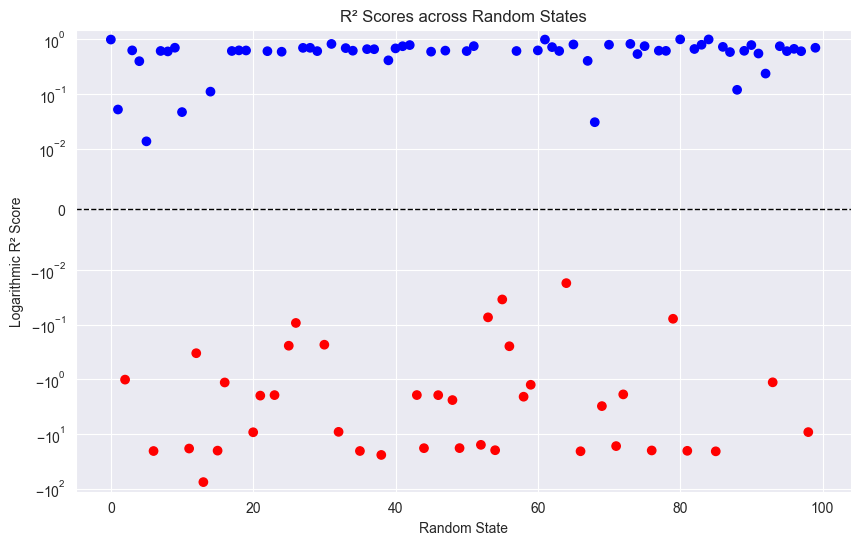

In [54]:
#Qui viene plottato l'R2 di ogni random state e viene visualizzato il valore di ognuno, per evidenziare quanti < 0 e quanti 0 > x > 1

# Scatter plot con scala simmetrica logaritmica
plt.figure(figsize=(10, 6))
plt.scatter(random_states, scores, color=['red' if s < 0 else 'blue' for s in scores])  # Rosso per R² negativi, blu per positivi
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Linea di riferimento a R² = 0
plt.xlabel('Random State')

plt.ylabel('Logarithmic R² Score')
plt.ylim(min(scores) * 1.5, max(scores) * 1.5)  # Espandi i limiti dell'asse Y

plt.yscale('symlog', base=10, linthresh=0.01)  # Imposta la scala logaritmica simmetrica, con scala lineare per valori vicino a zero
plt.title('R² Scores across Random States')
plt.grid(True)
plt.show()